In [1]:
#IMPORTAR LIBRERIA

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from matplotlib.pyplot import *
from sklearn.impute import KNNImputer
import scipy.stats as ss
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [2]:
pd_data = pd.read_csv("../TFMcodigo/data/raw/pd_data.csv",delimiter=",")
pd_data_monthly = pd.read_csv("../TFMcodigo/data/raw/pd_data_monthly.csv",delimiter=",")
pd_data_weekly = pd.read_csv("../TFMcodigo/data/raw/pd_data_weekly.csv",delimiter=",")

In [3]:
syp_data= pd.read_csv("../TFMcodigo/data/raw/syp_data.csv",delimiter=",")
syp_data_monthly= pd.read_csv("../TFMcodigo/data/raw/syp_data_mensual.csv",delimiter=",")
syp_data_weekly= pd.read_csv("../TFMcodigo/data/raw/syp_data_weekly.csv",delimiter=",")

# 3.REGRESIONES DE LOS RENDIMIENTOS DE NIKE JUNTO CON LOS DE SMB, HML Y S&P500

## 3.1. REGRESIONES DIARIAS CON S&P 500, SMB Y HML

In [4]:
data_SMB_HML_diaria = pd.read_csv("../TFMcodigo/data/raw/F-F_Research_Data_Factors_daily.CSV",delimiter=";")
data_SMB_HML_diaria.head()

,Date,Mkt-RF,SMB,HML,RF
0,22/2/10,-0.05,-0.05,0.60,0.0
1,23/2/10,-1.24,0.32,-0.94,0.0
2,24/2/10,0.94,-0.37,0.54,0.0
3,25/2/10,-0.13,0.22,0.26,0.0
4,26/2/10,0.13,-0.57,0.42,0.0


In [5]:
concatenated_df = pd.concat([syp_data, data_SMB_HML_diaria[['SMB', 'HML']]], axis=1)

In [6]:
concatenated_df.head()

,Unnamed: 0,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos,SMB,HML
0,0,2010-02-22,1110.00,1112.29,1105.38,1108.01,1108.01,3814440000,0.000394,-0.05,0.60
1,1,2010-02-23,1107.49,1108.58,1092.18,1094.60,1094.60,4521050000,-0.012177,0.32,-0.94
2,2,2010-02-24,1095.89,1106.42,1095.50,1105.24,1105.24,4168360000,0.009674,-0.37,0.54
3,3,2010-02-25,1101.24,1103.50,1086.02,1102.94,1102.94,4521130000,-0.002083,0.22,0.26
4,4,2010-02-26,1103.10,1107.24,1097.56,1104.49,1104.49,3945190000,0.001404,-0.57,0.42


In [7]:
concatenated_df["SMB"] = concatenated_df["SMB"].div(100)
concatenated_df["HML"] = concatenated_df["HML"].div(100)

## 3.1.1. MODELOS 

In [8]:
X = concatenated_df[['rendimientos', 'SMB', 'HML']] #x = sp500, SMB, HML estas somn los splines 
y = pd_data[['rendimientosNIKE']] #NIKE es la y

In [9]:
X.head()

,rendimientos,SMB,HML
0,0.000394,-0.0005,0.0060
1,-0.012177,0.0032,-0.0094
2,0.009674,-0.0037,0.0054
3,-0.002083,0.0022,0.0026
4,0.001404,-0.0057,0.0042


### 3.1.1.1. REGRESION SIMPLE

In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [11]:
#lm.coef_ y lm.intercept_ definen la ecuación de la recta de regresión lineal, 
#la cual se utiliza para predecir los valores de la variable dependiente 
#en función de los valores de las variables predictoras.
print(lm.coef_)#Beta
print(lm.intercept_)

[[ 0.99546259  0.08638968 -0.12980088]]
[0.00020971]


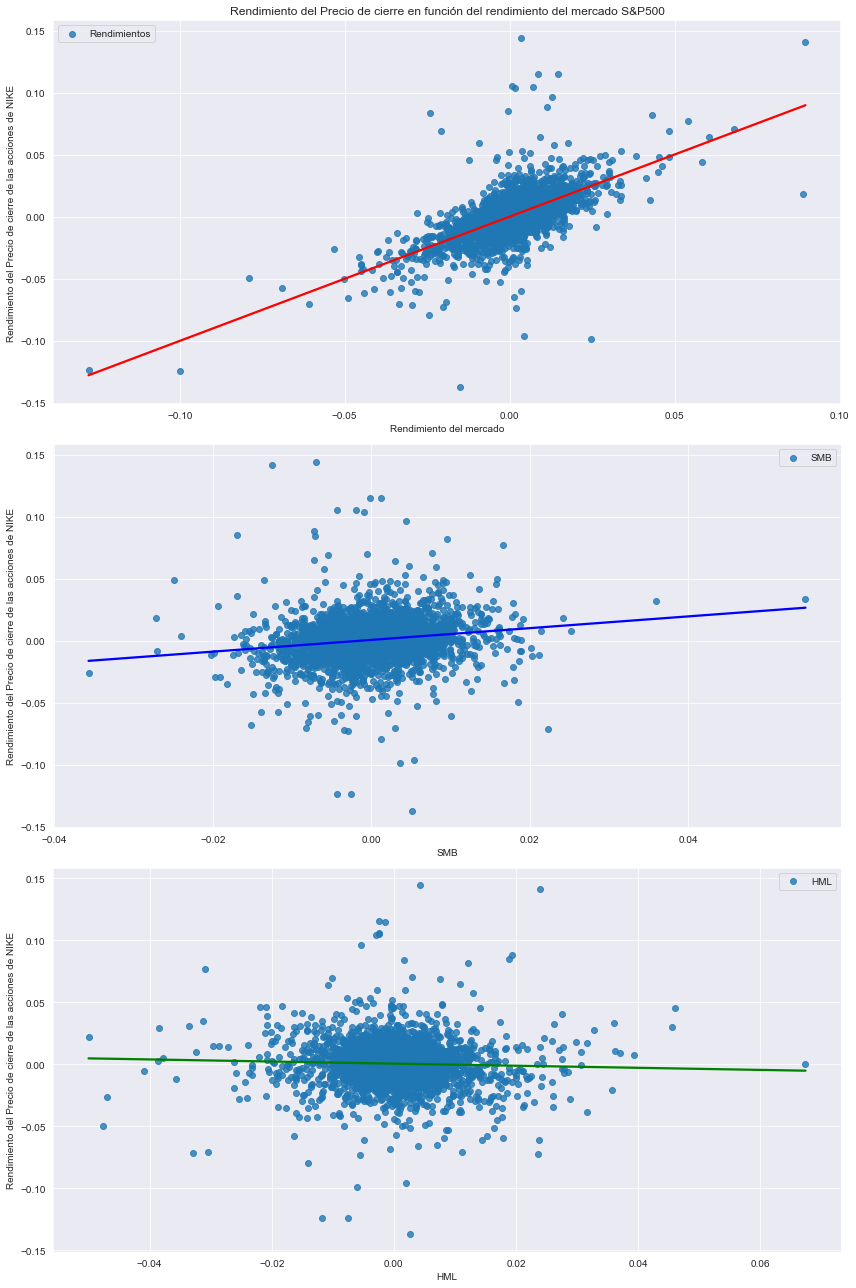

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

# Crear figura y subgráficos
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico de regresión para 'rendimientos'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['rendimientos'],
            ci=None,
            line_kws={"color": "red"},
            label='Rendimientos',
            ax=axes[0])

# Configuración del primer subgráfico
axes[0].set_title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500')
axes[0].set_xlabel('Rendimiento del mercado')
axes[0].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[0].legend()

# Gráfico de regresión para 'SMB'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['SMB'],
            ci=None,
            line_kws={"color": "blue"},
            label='SMB',
            ax=axes[1])

# Configuración del segundo subgráfico
axes[1].set_xlabel('SMB')
axes[1].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[1].legend()

# Gráfico de regresión para 'HML'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['HML'],
            ci=None,
            line_kws={"color": "green"},
            label='HML',
            ax=axes[2])

# Configuración del tercer subgráfico
axes[2].set_xlabel('HML')
axes[2].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[2].legend()

plt.tight_layout()
plt.show()



In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
lm = LinearRegression()

# Realizar predicciones usando validación cruzada por k-folds
y_pred = cross_val_predict(lm, X, y, cv=5)  # cv=5 significa 5-fold cross-validation

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("RMSE:", rmse)

RMSE: 0.013194781587929376


### 3.1.1.2. POLYNOMIAL REGRESSION

/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


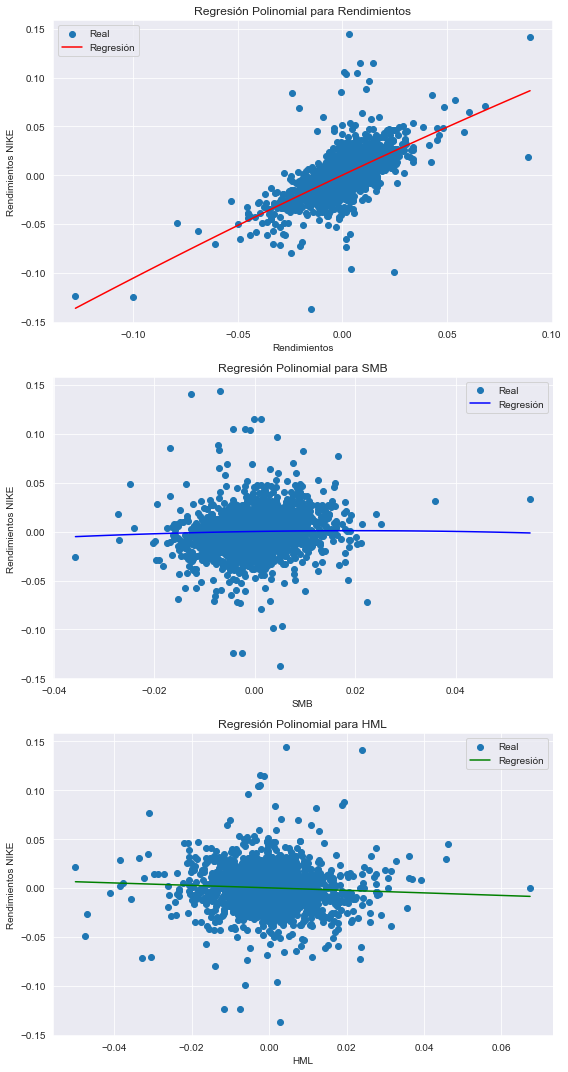

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Crear instancias de PolynomialFeatures y LinearRegression
poly = PolynomialFeatures(2)
model = LinearRegression()

# Transformar X con PolynomialFeatures
X_poly = poly.fit_transform(X)

# Ajustar el modelo
model.fit(X_poly, y)

# Valores para graficar
x_vals_rendimientos = np.linspace(min(X['rendimientos']), max(X['rendimientos']), 100)
x_vals_smb = np.linspace(min(X['SMB']), max(X['SMB']), 100)
x_vals_hml = np.linspace(min(X['HML']), max(X['HML']), 100)

# Crear las matrices de características polinomiales
x_vals_rendimientos_poly = poly.transform(np.column_stack((x_vals_rendimientos, np.zeros_like(x_vals_rendimientos), np.zeros_like(x_vals_rendimientos))))
x_vals_smb_poly = poly.transform(np.column_stack((np.zeros_like(x_vals_smb), x_vals_smb, np.zeros_like(x_vals_smb))))
x_vals_hml_poly = poly.transform(np.column_stack((np.zeros_like(x_vals_hml), np.zeros_like(x_vals_hml), x_vals_hml)))

# Predicciones
y_vals_rendimientos_pred = model.predict(x_vals_rendimientos_poly)
y_vals_smb_pred = model.predict(x_vals_smb_poly)
y_vals_hml_pred = model.predict(x_vals_hml_poly)

# Colores para las líneas
colors = ['red', 'blue', 'green']

# Graficar los resultados
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# Gráfica para rendimientosNike vs rendimientos
axs[0].scatter(X['rendimientos'], y, label='Real')
axs[0].plot(x_vals_rendimientos, y_vals_rendimientos_pred, color=colors[0], label='Regresión')
axs[0].set_xlabel('Rendimientos')
axs[0].set_ylabel('Rendimientos NIKE')
axs[0].set_title('Regresión Polinomial para Rendimientos')
axs[0].legend()

# Gráfica para rendimientosNike vs SMB
axs[1].scatter(X['SMB'], y, label='Real')
axs[1].plot(x_vals_smb, y_vals_smb_pred, color=colors[1], label='Regresión')
axs[1].set_xlabel('SMB')
axs[1].set_ylabel('Rendimientos NIKE')
axs[1].set_title('Regresión Polinomial para SMB')
axs[1].legend()

# Gráfica para rendimientosNike vs HML
axs[2].scatter(X['HML'], y, label='Real')
axs[2].plot(x_vals_hml, y_vals_hml_pred, color=colors[2], label='Regresión')
axs[2].set_xlabel('HML')
axs[2].set_ylabel('Rendimientos NIKE')
axs[2].set_title('Regresión Polinomial para HML')
axs[2].legend()

plt.tight_layout()
plt.show()


In [16]:
# Realizar las predicciones usando el modelo de regresión polinomial
y_vals_poly_pred = model.predict(X_poly)

# Calcular el RMSE para la regresión polinomial
rmse_poly = np.sqrt(mean_squared_error(y, y_vals_poly_pred))

print("RMSE para regresión polinomial:", rmse_poly)


RMSE para regresión polinomial: 0.013120928329021704


In [17]:
#Obtener los coeficientes del modelo
coeficientes_polynomial = model.coef_
# Imprimir los coeficientes
print("Coeficientes del modelo:", coeficientes_polynomial)

Coeficientes del modelo: [[ 0.          1.00582909  0.07861483 -0.1270279  -0.48320893  6.98283129
   1.95349215 -1.9473913  -0.86516086 -0.03499376]]


### 3.1.1.3. CUBIC SPLINES

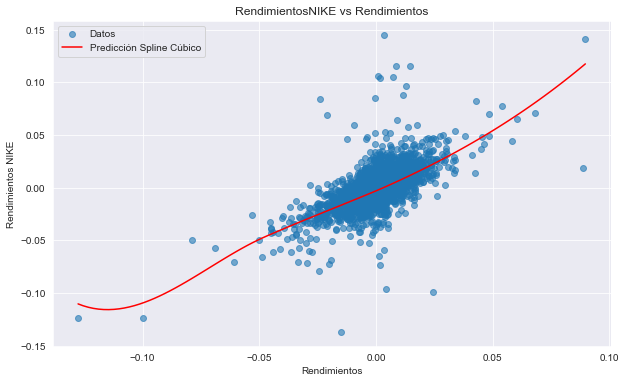

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrix
import matplotlib.pyplot as plt

# Generación de spline cúbico con 3 nudos a 25, 50 y 75 para cada variable predictora
knots_rend = np.percentile(X['rendimientos'], [25, 50, 75])
knots_SMB = np.percentile(X['SMB'], [25, 50, 75])
knots_HML = np.percentile(X['HML'], [25, 50, 75])

transformed_x = dmatrix(
    "bs(rend, knots=knots_rend, degree=3, include_intercept=False) + bs(SMB, knots=knots_SMB, degree=3, include_intercept=False) + bs(HML, knots=knots_HML, degree=3, include_intercept=False)", 
    {"rend": X['rendimientos'], "SMB": X['SMB'], "HML": X['HML']},
    return_type='dataframe'
)

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado
cs = sm.GLM(y, transformed_x).fit()
mu = cs.mu

# Puntos para la gráfica
x_vals = np.linspace(X['rendimientos'].min(), X['rendimientos'].max(), 100)
x_SMB_vals = np.linspace(X['SMB'].min(), X['SMB'].max(), 100)
x_HML_vals = np.linspace(X['HML'].min(), X['HML'].max(), 100)

transformed_x_vals = dmatrix(
    "bs(rend, knots=knots_rend, degree=3, include_intercept=False) + bs(SMB, knots=knots_SMB, degree=3, include_intercept=False) + bs(HML, knots=knots_HML, degree=3, include_intercept=False)", 
    {"rend": x_vals, "SMB": x_SMB_vals, "HML": x_HML_vals},
    return_type='dataframe'
)

# Predicción con el modelo ajustado
mu_vals = cs.predict(transformed_x_vals)

# Gráfica para rendimientosNIKE vs rendimientos
plt.figure(figsize=(10, 6))
plt.scatter(X['rendimientos'], y, label='Datos', alpha=0.6)
plt.plot(x_vals, mu_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('Rendimientos')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs Rendimientos')
plt.show()


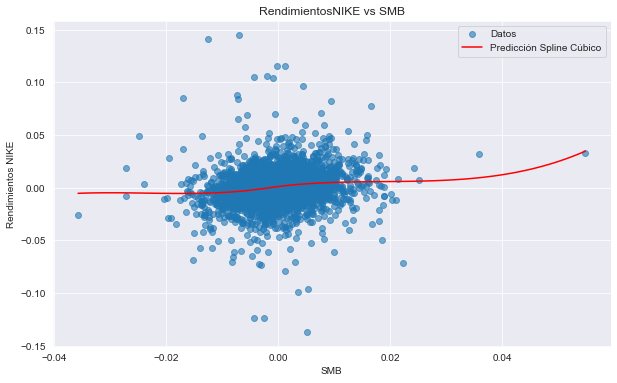

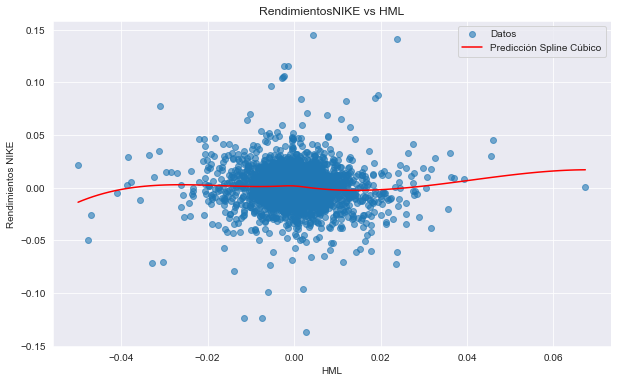

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrix
import matplotlib.pyplot as plt

# Generación de spline cúbico con 3 nudos a 25, 50 y 75 para cada variable predictora
knots_SMB = np.percentile(X['SMB'], [25, 50, 75])
knots_HML = np.percentile(X['HML'], [25, 50, 75])

transformed_x_SMB = dmatrix(
    "bs(SMB, knots=knots_SMB, degree=3, include_intercept=False)",
    {"SMB": X['SMB']},
    return_type='dataframe'
)

transformed_x_HML = dmatrix(
    "bs(HML, knots=knots_HML, degree=3, include_intercept=False)",
    {"HML": X['HML']},
    return_type='dataframe'
)

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado (para SMB)
cs_SMB = sm.GLM(y, transformed_x_SMB).fit()
mu_SMB = cs_SMB.mu

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado (para HML)
cs_HML = sm.GLM(y, transformed_x_HML).fit()
mu_HML = cs_HML.mu

# Puntos para la gráfica (SMB)
x_SMB_vals = np.linspace(X['SMB'].min(), X['SMB'].max(), 100)
transformed_x_SMB_vals = dmatrix(
    "bs(SMB, knots=knots_SMB, degree=3, include_intercept=False)",
    {"SMB": x_SMB_vals},
    return_type='dataframe'
)
mu_SMB_vals = cs_SMB.predict(transformed_x_SMB_vals)

# Puntos para la gráfica (HML)
x_HML_vals = np.linspace(X['HML'].min(), X['HML'].max(), 100)
transformed_x_HML_vals = dmatrix(
    "bs(HML, knots=knots_HML, degree=3, include_intercept=False)",
    {"HML": x_HML_vals},
    return_type='dataframe'
)
mu_HML_vals = cs_HML.predict(transformed_x_HML_vals)

# Gráfica para rendimientosNIKE vs SMB
plt.figure(figsize=(10, 6))
plt.scatter(X['SMB'], y, label='Datos', alpha=0.6)
plt.plot(x_SMB_vals, mu_SMB_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('SMB')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs SMB')
plt.show()

# Gráfica para rendimientosNIKE vs HML
plt.figure(figsize=(10, 6))
plt.scatter(X['HML'], y, label='Datos', alpha=0.6)
plt.plot(x_HML_vals, mu_HML_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('HML')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs HML')
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular RMSE para el modelo de spline cúbico con todas las variables predictoras
rmse_total = np.sqrt(mean_squared_error(y, mu))

# Calcular RMSE para el modelo de spline cúbico con SMB
rmse_SMB = np.sqrt(mean_squared_error(y, mu_SMB))

# Calcular RMSE para el modelo de spline cúbico con HML
rmse_HML = np.sqrt(mean_squared_error(y, mu_HML))

# Mostrar los RMSE
print("RMSE para spline cúbico (todas las variables):", rmse_total)
print("RMSE para spline cúbico (SMB):", rmse_SMB)
print("RMSE para spline cúbico (HML):", rmse_HML)

RMSE para spline cúbico (todas las variables): 0.01307951282962378
RMSE para spline cúbico (SMB): 0.017090985782482505
RMSE para spline cúbico (HML): 0.017291953687817274


In [21]:
# Coeficientes para rendimientos, SMB y HML
coeficientes = cs.params

beta_rendimientos = coeficientes[1]  # Coeficiente para rendimientos
beta_SMB = coeficientes[1 + len(knots_SMB)]  # Coeficiente para SMB
beta_HML = coeficientes[1 + len(knots_SMB) + len(knots_HML)]  # Coeficiente para HML

print("Beta para rendimientos:", beta_rendimientos)
print("Beta para SMB:", beta_SMB)
print("Beta para HML:", beta_HML)



Beta para rendimientos: 0.03789565944242318
Beta para SMB: 0.16285737315462157
Beta para HML: -0.010446083890766285


### 3.1.1.4. NATURAL CUBIC SPLINE

In [22]:
X.head()

,rendimientos,SMB,HML
0,0.000394,-0.0005,0.0060
1,-0.012177,0.0032,-0.0094
2,0.009674,-0.0037,0.0054
3,-0.002083,0.0022,0.0026
4,0.001404,-0.0057,0.0042


In [23]:
y.head()

,rendimientosNIKE
0,0.000609
1,-0.002803
2,0.012398
3,0.018766
4,0.021532


In [24]:
# Un unico dataframes 


xy=pd.concat([y,X], axis=1)
xy.tail()

,rendimientosNIKE,rendimientos,SMB,HML
3271,0.003692,-0.002771,0.0068,-0.0015
3272,-0.030416,-0.020245,-0.0124,0.0091
3273,-0.009959,-0.001575,0.0055,-0.0043
3274,0.000500,0.005315,0.0021,-0.0023
3275,-0.016135,0.002961,-0.0049,0.0126


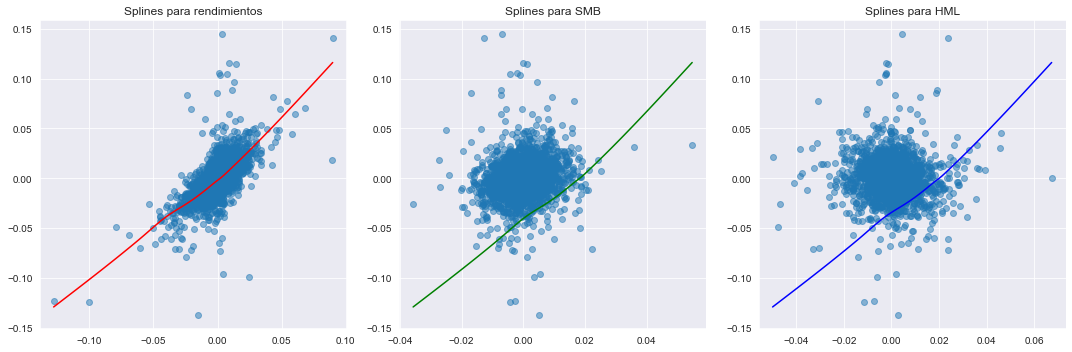

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#  DataFrame 'xy'

# Ajustar el modelo con splines cúbicos
model_gam = smf.ols('rendimientosNIKE ~ cr(rendimientos, df=6) + cr(SMB, df=6) + cr(HML, df=6)', data=xy).fit()

# Definir los valores para las predicciones
x_rendimientos = np.linspace(xy['rendimientos'].min(), xy['rendimientos'].max(), 100)
x_SMB = np.linspace(xy['SMB'].min(), xy['SMB'].max(), 100)
x_HML = np.linspace(xy['HML'].min(), xy['HML'].max(), 100)

# Predecir los valores ajustados usando el modelo
y_pred = model_gam.predict(exog=dict(rendimientos=x_rendimientos, SMB=x_SMB, HML=x_HML))

# Graficar los resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(x_rendimientos, y_pred, label='rendimientos', color='r')
axs[0].scatter(xy['rendimientos'], xy['rendimientosNIKE'], alpha=0.5)
axs[0].set_title('Splines para rendimientos')

axs[1].plot(x_SMB, y_pred, label='SMB', color='g')
axs[1].scatter(xy['SMB'], xy['rendimientosNIKE'], alpha=0.5)
axs[1].set_title('Splines para SMB')

axs[2].plot(x_HML, y_pred, label='HML', color='b')
axs[2].scatter(xy['HML'], xy['rendimientosNIKE'], alpha=0.5)
axs[2].set_title('Splines para HML')

plt.tight_layout()
plt.show()


In [26]:
# Obtener los coeficientes del modelo ajustado
coeficientes = model_gam.params

# Mostrar los coeficientes
print(coeficientes)


Intercept                   -0.001340
cr(rendimientos, df=6)[0]   -0.122303
cr(rendimientos, df=6)[1]    0.000597
cr(rendimientos, df=6)[2]    0.005376
cr(rendimientos, df=6)[3]    0.008056
cr(rendimientos, df=6)[4]    0.013072
cr(rendimientos, df=6)[5]    0.093861
cr(SMB, df=6)[0]            -0.013629
cr(SMB, df=6)[1]            -0.002707
cr(SMB, df=6)[2]            -0.002158
cr(SMB, df=6)[3]            -0.001365
cr(SMB, df=6)[4]            -0.002107
cr(SMB, df=6)[5]             0.020625
cr(HML, df=6)[0]             0.008076
cr(HML, df=6)[1]            -0.001980
cr(HML, df=6)[2]            -0.001247
cr(HML, df=6)[3]            -0.004138
cr(HML, df=6)[4]            -0.005126
cr(HML, df=6)[5]             0.003075
dtype: float64


In [27]:
from sklearn.metrics import mean_squared_error
y_pred = model_gam.predict(xy)
rmse_test =mean_squared_error(xy.rendimientosNIKE, y_pred, squared=False)
rmse_test

0.013101077266709404

## 3.2. REGRESIONES SEMANALES CON S&P 500, SMB Y HML

In [28]:
data_SMB_HML_semanal = pd.read_csv("../TFMcodigo/data/raw/F-F_Research_Data_Factors_weekly.csv",delimiter=";")
data_SMB_HML_semanal.head()

,Fecha,Mkt-RF,SMB,HML,RF
0,19/2/10,3.18,-0.02,1.62,0.000
1,26/2/10,-0.37,-0.36,0.86,0.000
2,5/3/10,3.46,2.56,1.18,0.002
3,12/3/10,1.18,0.39,0.58,0.002
4,19/3/10,0.61,-1.12,-0.70,0.002


In [29]:
df_semanal = pd.concat([syp_data_weekly, data_SMB_HML_semanal[['SMB', 'HML']]], axis=1)

In [30]:
df_semanal["SMB"] = df_semanal["SMB"].div(100)
df_semanal["HML"] = df_semanal["HML"].div(100)

In [31]:
df_semanal.head()

,Unnamed: 0,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos,SMB,HML
0,0.0,2010-02-28,1103.544,1107.606,1095.328,1103.056,1103.056,4.194034e+09,-0.000558,-0.0002,0.0162
1,1.0,2010-03-07,1117.194,1125.664,1116.046,1122.896,1122.896,4.002330e+09,0.006101,-0.0036,0.0086
2,2.0,2010-03-14,1142.370,1147.666,1139.544,1144.958,1144.958,4.805318e+09,0.001973,0.0256,0.0118
3,3.0,2010-03-21,1158.422,1163.614,1153.646,1160.382,1160.382,4.588800e+09,0.001716,0.0039,0.0058
4,4.0,2010-03-28,1166.806,1174.040,1161.858,1168.004,1168.004,4.751278e+09,0.001150,-0.0112,-0.0070


In [32]:
#Verificacion de columnas con valores faltantes
null_columns=df_semanal.isnull().sum().sort_values(ascending=False).rename("null_values").reset_index()
null_columns

,index,null_values
0,Unnamed: 0,1
1,Fecha,1
2,Abrir,1
3,Máx.,1
4,Mín.,1
5,Cierre,1
6,Cierre ajus.,1
7,Volumen,1
8,rendimientos,1
9,SMB,0


In [33]:
df_semanal = df_semanal.dropna()

In [34]:
#Verificacion de columnas con valores faltantes
null_columns=df_semanal.isnull().sum().sort_values(ascending=False).rename("null_values").reset_index()
null_columns

,index,null_values
0,Unnamed: 0,0
1,Fecha,0
2,Abrir,0
3,Máx.,0
4,Mín.,0
5,Cierre,0
6,Cierre ajus.,0
7,Volumen,0
8,rendimientos,0
9,SMB,0


## 3.2.2. MODELOS

In [35]:
X = df_semanal[['rendimientos', 'SMB', 'HML']] #x = sp500, SMB, HML estas somn los splines 
y = pd_data_weekly[['rendimientosNIKE']] #NIKE es la y

In [36]:
X.head()

,rendimientos,SMB,HML
0,-0.000558,-0.0002,0.0162
1,0.006101,-0.0036,0.0086
2,0.001973,0.0256,0.0118
3,0.001716,0.0039,0.0058
4,0.001150,-0.0112,-0.0070


In [37]:
y.head()

,rendimientosNIKE
0,0.010100
1,0.002119
2,0.004573
3,0.010098
4,0.001004


### 3.2.2.1. REGRESION SIMPLE

In [38]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [39]:
#lm.coef_ y lm.intercept_ definen la ecuación de la recta de regresión lineal, 
#la cual se utiliza para predecir los valores de la variable dependiente 
#en función de los valores de las variables predictoras.
print(lm.coef_)
print(lm.intercept_)

[[ 1.01637398 -0.0090303  -0.00747425]]
[0.00022298]


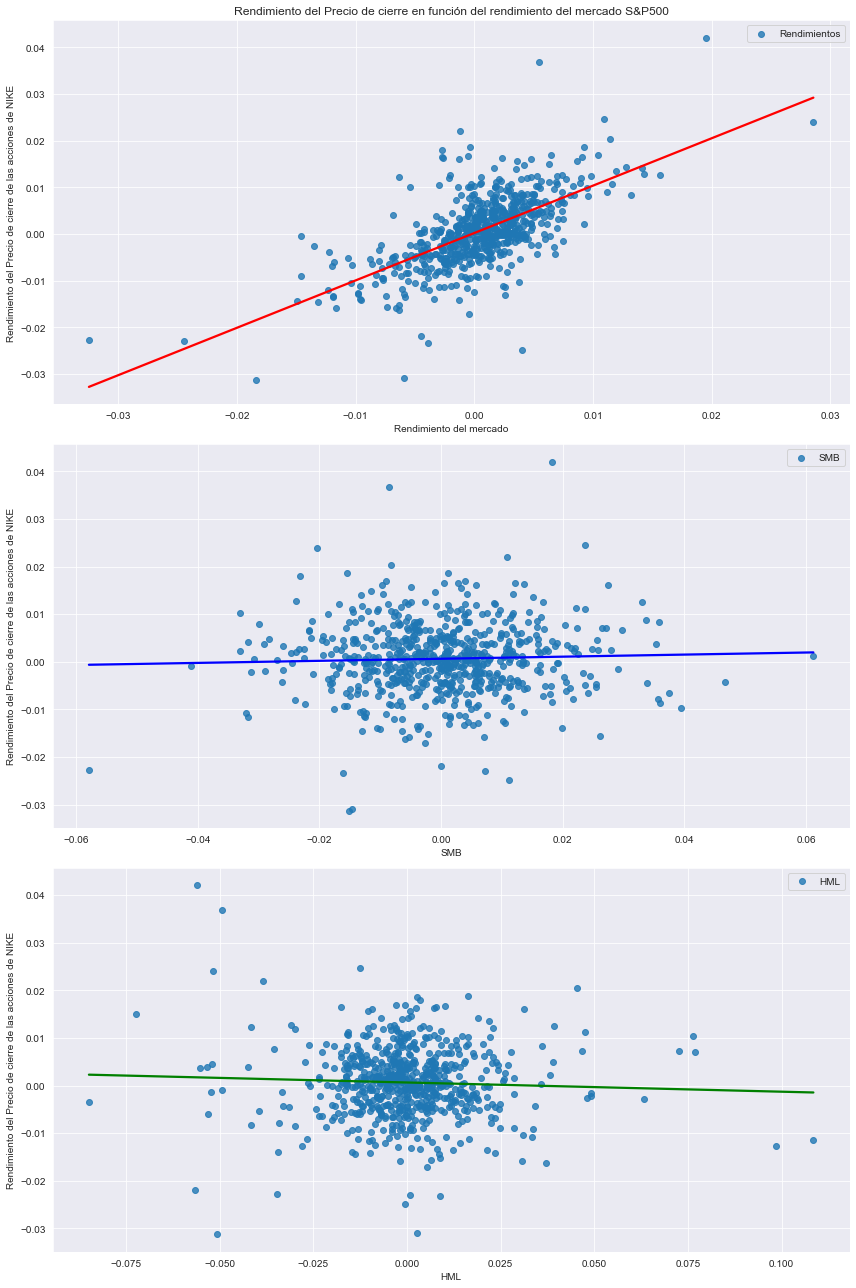

In [40]:
sns.set_style('darkgrid')

# Crear figura y subgráficos
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico de regresión para 'rendimientos'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['rendimientos'],
            ci=None,
            line_kws={"color": "red"},
            label='Rendimientos',
            ax=axes[0])

# Configuración del primer subgráfico
axes[0].set_title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500')
axes[0].set_xlabel('Rendimiento del mercado')
axes[0].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[0].legend()

# Gráfico de regresión para 'SMB'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['SMB'],
            ci=None,
            line_kws={"color": "blue"},
            label='SMB',
            ax=axes[1])

# Configuración del segundo subgráfico
axes[1].set_xlabel('SMB')
axes[1].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[1].legend()

# Gráfico de regresión para 'HML'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['HML'],
            ci=None,
            line_kws={"color": "green"},
            label='HML',
            ax=axes[2])

# Configuración del tercer subgráfico
axes[2].set_xlabel('HML')
axes[2].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[2].legend()

plt.tight_layout()
plt.show()

In [41]:
lm = LinearRegression()

# Realizar predicciones usando validación cruzada por k-folds
y_pred = cross_val_predict(lm, X, y, cv=5)  # cv=5 significa 5-fold cross-validation

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("RMSE:", rmse)

RMSE: 0.005778217672038095


### 3.2.2.2. POLYNOMIAL REGRESION

/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


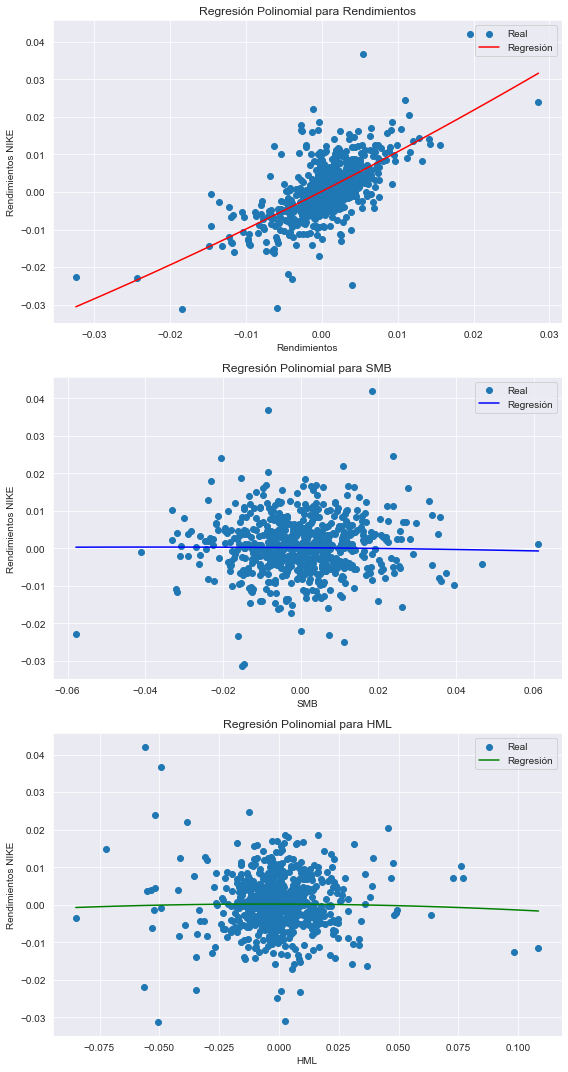

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Crear instancias de PolynomialFeatures y LinearRegression
poly = PolynomialFeatures(2)
model = LinearRegression()

# Transformar X con PolynomialFeatures
X_poly = poly.fit_transform(X)

# Ajustar el modelo
model.fit(X_poly, y)

# Valores para graficar
x_vals_rendimientos = np.linspace(min(X['rendimientos']), max(X['rendimientos']), 100)
x_vals_smb = np.linspace(min(X['SMB']), max(X['SMB']), 100)
x_vals_hml = np.linspace(min(X['HML']), max(X['HML']), 100)

# Crear las matrices de características polinomiales
x_vals_rendimientos_poly = poly.transform(np.column_stack((x_vals_rendimientos, np.zeros_like(x_vals_rendimientos), np.zeros_like(x_vals_rendimientos))))
x_vals_smb_poly = poly.transform(np.column_stack((np.zeros_like(x_vals_smb), x_vals_smb, np.zeros_like(x_vals_smb))))
x_vals_hml_poly = poly.transform(np.column_stack((np.zeros_like(x_vals_hml), np.zeros_like(x_vals_hml), x_vals_hml)))

# Predicciones
y_vals_rendimientos_pred = model.predict(x_vals_rendimientos_poly)
y_vals_smb_pred = model.predict(x_vals_smb_poly)
y_vals_hml_pred = model.predict(x_vals_hml_poly)

# Colores para las líneas
colors = ['red', 'blue', 'green']

# Graficar los resultados
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# Gráfica para rendimientosNike vs rendimientos
axs[0].scatter(X['rendimientos'], y, label='Real')
axs[0].plot(x_vals_rendimientos, y_vals_rendimientos_pred, color=colors[0], label='Regresión')
axs[0].set_xlabel('Rendimientos')
axs[0].set_ylabel('Rendimientos NIKE')
axs[0].set_title('Regresión Polinomial para Rendimientos')
axs[0].legend()

# Gráfica para rendimientosNike vs SMB
axs[1].scatter(X['SMB'], y, label='Real')
axs[1].plot(x_vals_smb, y_vals_smb_pred, color=colors[1], label='Regresión')
axs[1].set_xlabel('SMB')
axs[1].set_ylabel('Rendimientos NIKE')
axs[1].set_title('Regresión Polinomial para SMB')
axs[1].legend()

# Gráfica para rendimientosNike vs HML
axs[2].scatter(X['HML'], y, label='Real')
axs[2].plot(x_vals_hml, y_vals_hml_pred, color=colors[2], label='Regresión')
axs[2].set_xlabel('HML')
axs[2].set_ylabel('Rendimientos NIKE')
axs[2].set_title('Regresión Polinomial para HML')
axs[2].legend()

plt.tight_layout()
plt.show()




In [43]:
# Realizar las predicciones usando el modelo de regresión polinomial
y_vals_poly_pred = model.predict(X_poly)

# Calcular el RMSE para la regresión polinomial
rmse_poly = np.sqrt(mean_squared_error(y, y_vals_poly_pred))

print("RMSE para regresión polinomial:", rmse_poly)


RMSE para regresión polinomial: 0.005695953253998679


In [44]:
#Obtener los coeficientes del modelo
coeficientes_polynomial = model.coef_
# Imprimir los coeficientes
print("Coeficientes del modelo:", coeficientes_polynomial)

Coeficientes del modelo: [[ 0.00000000e+00  1.02978078e+00 -8.12166222e-03 -1.44231023e-03
   2.51634506e+00  5.07287803e+00 -3.02086747e+00 -1.02459011e-01
   6.12525060e-01 -1.44095840e-01]]


1.Intercepto (Constante):
    
Coeficiente 0: 0.00000000e+00
    
El término independiente o intercepto es cero, lo que indica que no hay una contribución constante en la predicción.

2.Términos Lineales (Primer Grado):
    
Coeficiente 1: 1.02978078e+00 (rendimientos)
    
Coeficiente 2: -8.12166222e-03 (SMB)
    
Coeficiente 3: -1.44231023e-03 (HML)
    
Los coeficientes lineales indican la relación lineal entre cada característica y la variable objetivo. Un coeficiente positivo (como el primero) sugiere una relación directa, mientras que coeficientes negativos indican una relación inversa.

3.Términos Cuadráticos (Segundo Grado):
    
Coeficiente 4: 2.51634506e+00 (rendimientos^2)
    
Coeficiente 5: 5.07287803e+00 (SMB^2)
    
Coeficiente 6: -3.02086747e+00 (HML^2)
    
Los coeficientes cuadráticos reflejan cómo las características cuadráticas influyen en la variable objetivo. Un coeficiente positivo (como el cuarto y el quinto) indica una relación curva ascendente, mientras que un coeficiente negativo (como el sexto) indica una relación curva descendente.

4.Términos de Interacción:
    
Coeficientes 7 a 9: -1.02459011e-01, 6.12525060e-01, -1.44095840e-01
    
Estos coeficientes modelan las interacciones entre las características predictoras. Por ejemplo, un coeficiente positivo (como el octavo) indica que la interacción entre SMB y HML tiene un efecto positivo en la variable objetivo.

En resumen, cada coeficiente en el modelo de regresión polinomial contribuye a modelar cómo las características predictoras afectan la variable objetivo en diferentes formas y grados, ya sea de manera lineal, cuadrática o a través de interacciones entre las características. Estos coeficientes se obtienen mediante el proceso de ajuste del modelo a los datos y representan las relaciones complejas entre las variables en el contexto del polinomio de segundo grado.






### 3.2.2.3. CUBIC SPLINE

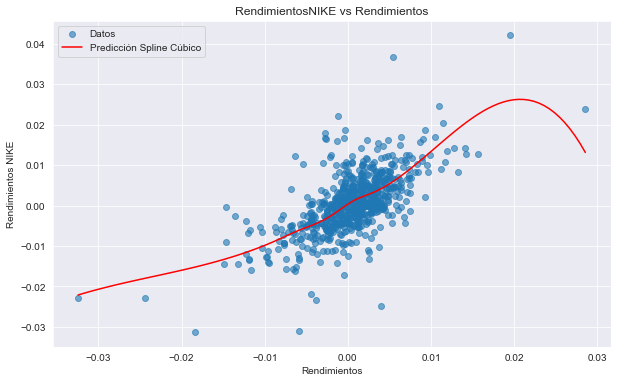

In [45]:
# Generación de spline cúbico con 3 nudos a 25, 50 y 75 para cada variable predictora
knots_rend = np.percentile(X['rendimientos'], [25, 50, 75])
knots_SMB = np.percentile(X['SMB'], [25, 50, 75])
knots_HML = np.percentile(X['HML'], [25, 50, 75])

transformed_x = dmatrix(
    "bs(rend, knots=knots_rend, degree=3, include_intercept=False) + bs(SMB, knots=knots_SMB, degree=3, include_intercept=False) + bs(HML, knots=knots_HML, degree=3, include_intercept=False)", 
    {"rend": X['rendimientos'], "SMB": X['SMB'], "HML": X['HML']},
    return_type='dataframe'
)

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado
cs = sm.GLM(y, transformed_x).fit()
mu = cs.mu

# Puntos para la gráfica
x_vals = np.linspace(X['rendimientos'].min(), X['rendimientos'].max(), 100)
x_SMB_vals = np.linspace(X['SMB'].min(), X['SMB'].max(), 100)
x_HML_vals = np.linspace(X['HML'].min(), X['HML'].max(), 100)

transformed_x_vals = dmatrix(
    "bs(rend, knots=knots_rend, degree=3, include_intercept=False) + bs(SMB, knots=knots_SMB, degree=3, include_intercept=False) + bs(HML, knots=knots_HML, degree=3, include_intercept=False)", 
    {"rend": x_vals, "SMB": x_SMB_vals, "HML": x_HML_vals},
    return_type='dataframe'
)

# Predicción con el modelo ajustado
mu_vals = cs.predict(transformed_x_vals)

# Gráfica para rendimientosNIKE vs rendimientos
plt.figure(figsize=(10, 6))
plt.scatter(X['rendimientos'], y, label='Datos', alpha=0.6)
plt.plot(x_vals, mu_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('Rendimientos')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs Rendimientos')
plt.show()

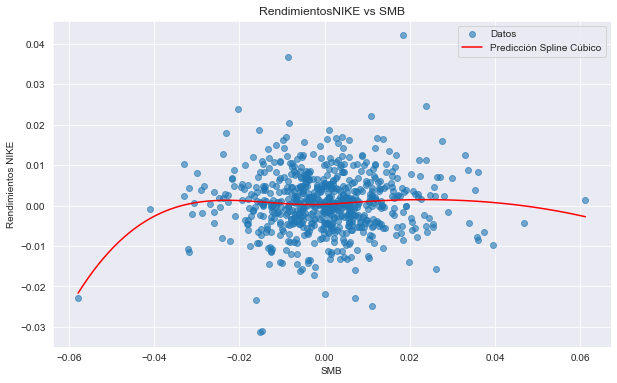

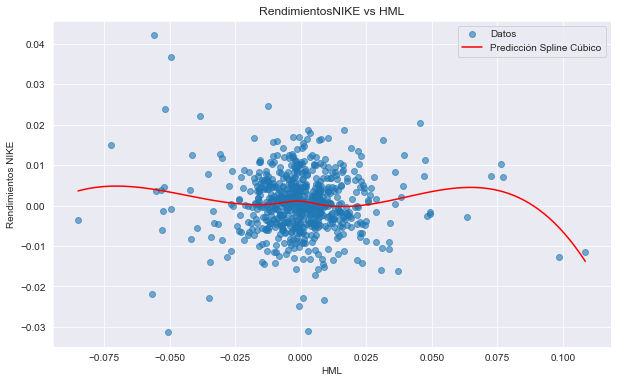

In [46]:
# Generación de spline cúbico con 3 nudos a 25, 50 y 75 para cada variable predictora
knots_SMB = np.percentile(X['SMB'], [25, 50, 75])
knots_HML = np.percentile(X['HML'], [25, 50, 75])

transformed_x_SMB = dmatrix(
    "bs(SMB, knots=knots_SMB, degree=3, include_intercept=False)",
    {"SMB": X['SMB']},
    return_type='dataframe'
)

transformed_x_HML = dmatrix(
    "bs(HML, knots=knots_HML, degree=3, include_intercept=False)",
    {"HML": X['HML']},
    return_type='dataframe'
)

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado (para SMB)
cs_SMB = sm.GLM(y, transformed_x_SMB).fit()
mu_SMB = cs_SMB.mu

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado (para HML)
cs_HML = sm.GLM(y, transformed_x_HML).fit()
mu_HML = cs_HML.mu

# Puntos para la gráfica (SMB)
x_SMB_vals = np.linspace(X['SMB'].min(), X['SMB'].max(), 100)
transformed_x_SMB_vals = dmatrix(
    "bs(SMB, knots=knots_SMB, degree=3, include_intercept=False)",
    {"SMB": x_SMB_vals},
    return_type='dataframe'
)
mu_SMB_vals = cs_SMB.predict(transformed_x_SMB_vals)

# Puntos para la gráfica (HML)
x_HML_vals = np.linspace(X['HML'].min(), X['HML'].max(), 100)
transformed_x_HML_vals = dmatrix(
    "bs(HML, knots=knots_HML, degree=3, include_intercept=False)",
    {"HML": x_HML_vals},
    return_type='dataframe'
)
mu_HML_vals = cs_HML.predict(transformed_x_HML_vals)

# Gráfica para rendimientosNIKE vs SMB
plt.figure(figsize=(10, 6))
plt.scatter(X['SMB'], y, label='Datos', alpha=0.6)
plt.plot(x_SMB_vals, mu_SMB_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('SMB')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs SMB')
plt.show()

# Gráfica para rendimientosNIKE vs HML
plt.figure(figsize=(10, 6))
plt.scatter(X['HML'], y, label='Datos', alpha=0.6)
plt.plot(x_HML_vals, mu_HML_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('HML')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs HML')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular RMSE para el modelo de spline cúbico con todas las variables predictoras
rmse_total = np.sqrt(mean_squared_error(y, mu))

# Calcular RMSE para el modelo de spline cúbico con SMB
rmse_SMB = np.sqrt(mean_squared_error(y, mu_SMB))

# Calcular RMSE para el modelo de spline cúbico con HML
rmse_HML = np.sqrt(mean_squared_error(y, mu_HML))

# Mostrar los RMSE
print("RMSE para spline cúbico (todas las variables):", rmse_total)
print("RMSE para spline cúbico (SMB):", rmse_SMB)
print("RMSE para spline cúbico (HML):", rmse_HML)

RMSE para spline cúbico (todas las variables): 0.0056523089091368535
RMSE para spline cúbico (SMB): 0.0074855680312876
RMSE para spline cúbico (HML): 0.007487861993793307


In [48]:
# Coeficientes para rendimientos, SMB y HML
coeficientes = cs.params

beta_rendimientos = coeficientes[1]  # Coeficiente para rendimientos
beta_SMB = coeficientes[1 + len(knots_SMB)]  # Coeficiente para SMB
beta_HML = coeficientes[1 + len(knots_SMB) + len(knots_HML)]  # Coeficiente para HML

print("Beta para rendimientos:", beta_rendimientos)
print("Beta para SMB:", beta_SMB)
print("Beta para HML:", beta_HML)

Beta para rendimientos: 0.03335143333847001
Beta para SMB: 0.04853413833975734
Beta para HML: -0.023525589047753398


### 3.2.2.4. NATURAL CUBIC SPLINE

In [49]:
# Un unico dataframes 


xy=pd.concat([y,X], axis=1)
xy.tail()

,rendimientosNIKE,rendimientos,SMB,HML
674,0.001432,0.004871,0.0009,-0.0111
675,0.000125,0.003213,-0.0007,-0.0133
676,-0.008615,-0.002238,0.0360,-0.0216
677,0.004226,-0.000557,-0.0318,0.0269
678,-0.014002,-0.003386,0.0198,-0.0148


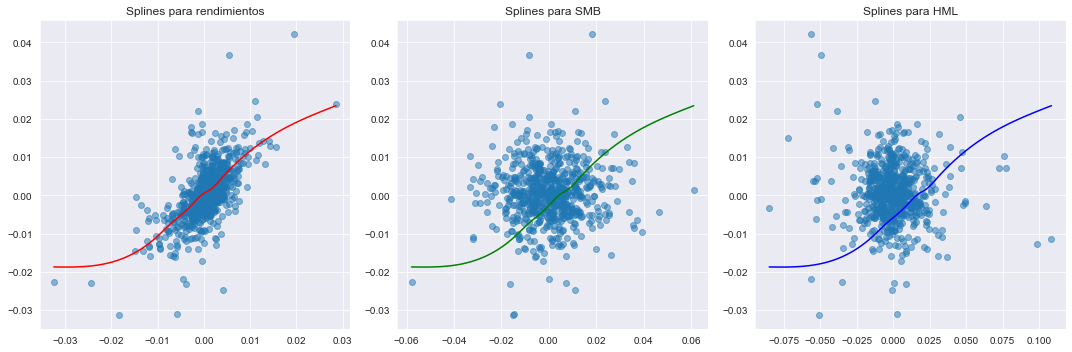

In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#  DataFrame 'xy'

# Ajustar el modelo con splines cúbicos
model_gam = smf.ols('rendimientosNIKE ~ cr(rendimientos, df=6) + cr(SMB, df=6) + cr(HML, df=6)', data=xy).fit()

# Definir los valores para las predicciones
x_rendimientos = np.linspace(xy['rendimientos'].min(), xy['rendimientos'].max(), 100)
x_SMB = np.linspace(xy['SMB'].min(), xy['SMB'].max(), 100)
x_HML = np.linspace(xy['HML'].min(), xy['HML'].max(), 100)

# Predecir los valores ajustados usando el modelo
y_pred = model_gam.predict(exog=dict(rendimientos=x_rendimientos, SMB=x_SMB, HML=x_HML))

# Graficar los resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(x_rendimientos, y_pred, label='rendimientos', color='r')
axs[0].scatter(xy['rendimientos'], xy['rendimientosNIKE'], alpha=0.5)
axs[0].set_title('Splines para rendimientos')

axs[1].plot(x_SMB, y_pred, label='SMB', color='g')
axs[1].scatter(xy['SMB'], xy['rendimientosNIKE'], alpha=0.5)
axs[1].set_title('Splines para SMB')

axs[2].plot(x_HML, y_pred, label='HML', color='b')
axs[2].scatter(xy['HML'], xy['rendimientosNIKE'], alpha=0.5)
axs[2].set_title('Splines para HML')

plt.tight_layout()
plt.show()

In [51]:
# Obtener los coeficientes del modelo ajustado
coeficientes = model_gam.params

# Mostrar los coeficientes
print(coeficientes)

Intercept                    0.000876
cr(rendimientos, df=6)[0]   -0.025824
cr(rendimientos, df=6)[1]   -0.003841
cr(rendimientos, df=6)[2]   -0.001197
cr(rendimientos, df=6)[3]   -0.000181
cr(rendimientos, df=6)[4]    0.001917
cr(rendimientos, df=6)[5]    0.030002
cr(SMB, df=6)[0]             0.003695
cr(SMB, df=6)[1]             0.000223
cr(SMB, df=6)[2]             0.000497
cr(SMB, df=6)[3]             0.000138
cr(SMB, df=6)[4]             0.000540
cr(SMB, df=6)[5]            -0.004219
cr(HML, df=6)[0]             0.002516
cr(HML, df=6)[1]             0.000335
cr(HML, df=6)[2]             0.000574
cr(HML, df=6)[3]             0.000213
cr(HML, df=6)[4]             0.000470
cr(HML, df=6)[5]            -0.003232
dtype: float64


In [52]:
from sklearn.metrics import mean_squared_error
y_pred = model_gam.predict(xy)
rmse_test =mean_squared_error(xy.rendimientosNIKE, y_pred, squared=False)
rmse_test

0.0056855578830936225

## 3.3. REGRESIONES MENSUALES CON S&P 500, SMB Y HML

In [123]:
monthly_SMB_HML  = pd.read_csv("../TFMcodigo/data/raw/Monthly_SMB_HML.csv",delimiter=";")
monthly_SMB_HML.head()

,Fecha,SMB,HML
0,28/2/10,-0.000600,0.002260
1,31/3/10,0.000909,0.001430
2,30/4/10,0.002529,0.001876
3,31/5/10,0.004450,-0.000650
4,30/6/10,-0.000509,-0.001682


In [124]:
 monthly_df= pd.concat([syp_data_monthly, monthly_SMB_HML[['SMB', 'HML']]], axis=1)

In [125]:
monthly_df.head()

,Unnamed: 0,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,rendimientos,SMB,HML
0,0,2010-02-28,1103.544000,1107.606000,1095.328000,1103.056000,1103.056000,4.194034e+09,-0.000558,-0.000600,0.002260
1,1,2010-03-31,1149.442174,1155.746087,1145.994348,1152.048696,1152.048696,4.507980e+09,0.002484,0.000909,0.001430
2,2,2010-04-30,1196.390952,1202.634286,1189.531429,1197.316190,1197.316190,5.559139e+09,0.000698,0.002529,0.001876
3,3,2010-05-31,1129.105000,1139.656000,1109.045000,1125.062000,1125.062000,6.383139e+09,-0.004277,0.004450,-0.000650
4,4,2010-06-30,1086.281818,1095.199545,1074.715909,1083.360909,1083.360909,5.004852e+09,-0.002518,-0.000509,-0.001682


## 3.3.1. MODELOS

In [126]:
X = monthly_df[['rendimientos', 'SMB', 'HML']] #x = sp500, SMB, HML estas somn los splines 
y = pd_data_monthly[['rendimientosNIKE']] #NIKE es la y

## 3.3.1.1. REGRESION SIMPLE

In [127]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [128]:
#lm.coef_ y lm.intercept_ definen la ecuación de la recta de regresión lineal, 
#la cual se utiliza para predecir los valores de la variable dependiente 
#en función de los valores de las variables predictoras.
print(lm.coef_)
print(lm.intercept_)

[[ 0.96035451  0.02167451 -0.08370201]]
[0.00036628]


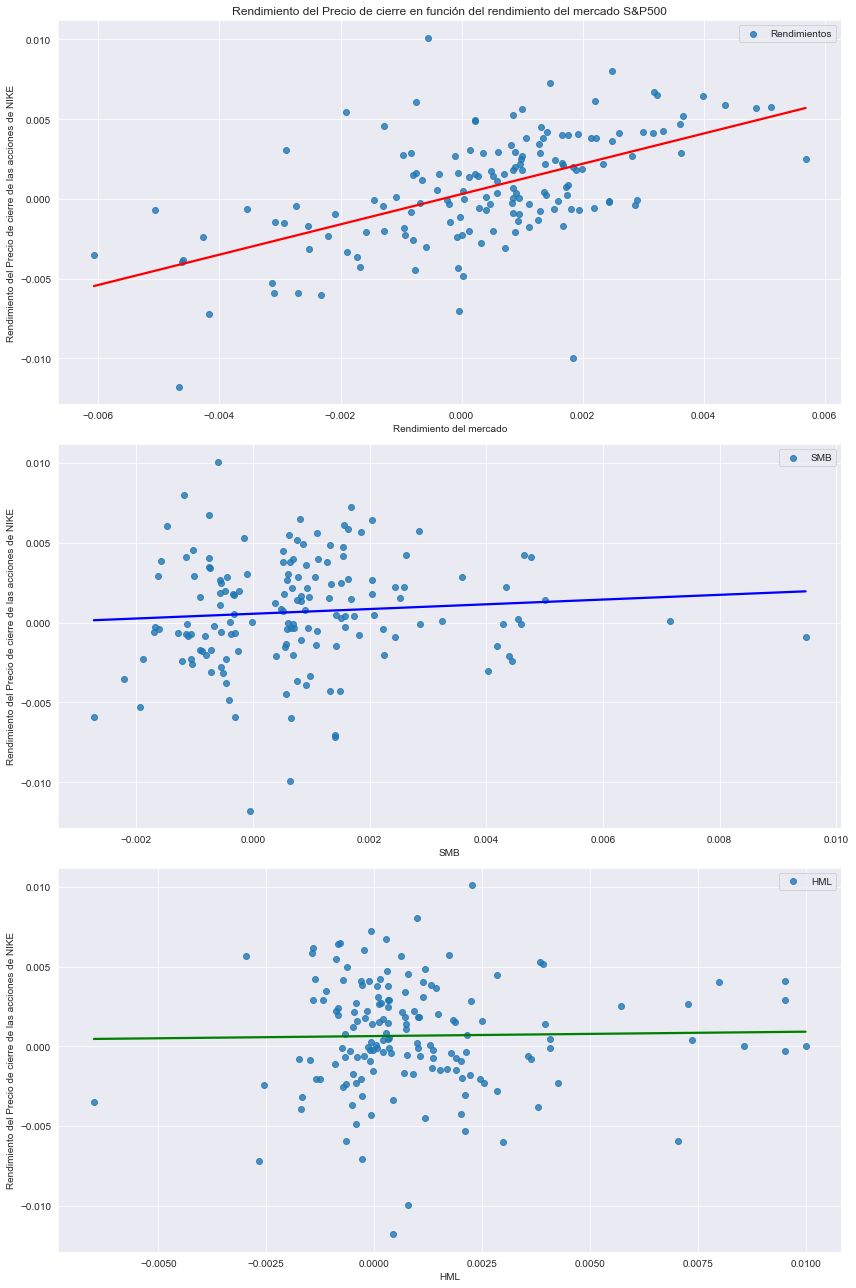

In [129]:
sns.set_style('darkgrid')

# Crear figura y subgráficos
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico de regresión para 'rendimientos'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['rendimientos'],
            ci=None,
            line_kws={"color": "red"},
            label='Rendimientos',
            ax=axes[0])

# Configuración del primer subgráfico
axes[0].set_title('Rendimiento del Precio de cierre en función del rendimiento del mercado S&P500')
axes[0].set_xlabel('Rendimiento del mercado')
axes[0].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[0].legend()

# Gráfico de regresión para 'SMB'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['SMB'],
            ci=None,
            line_kws={"color": "blue"},
            label='SMB',
            ax=axes[1])

# Configuración del segundo subgráfico
axes[1].set_xlabel('SMB')
axes[1].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[1].legend()

# Gráfico de regresión para 'HML'
sns.regplot(y=y['rendimientosNIKE'],
            x=X['HML'],
            ci=None,
            line_kws={"color": "green"},
            label='HML',
            ax=axes[2])

# Configuración del tercer subgráfico
axes[2].set_xlabel('HML')
axes[2].set_ylabel('Rendimiento del Precio de cierre de las acciones de NIKE')
axes[2].legend()

plt.tight_layout()
plt.show()

In [131]:
lm = LinearRegression()

# Realizar predicciones usando validación cruzada por k-folds
y_pred = cross_val_predict(lm, X, y, cv=5)  # cv=5 significa 5-fold cross-validation

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("RMSE:", rmse)

RMSE: 0.002931023692265013


### 3.3.1.2. POLYNOMINAL REGRESSION

/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/administrador/opt/anaconda3/envs/MachineDiego/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


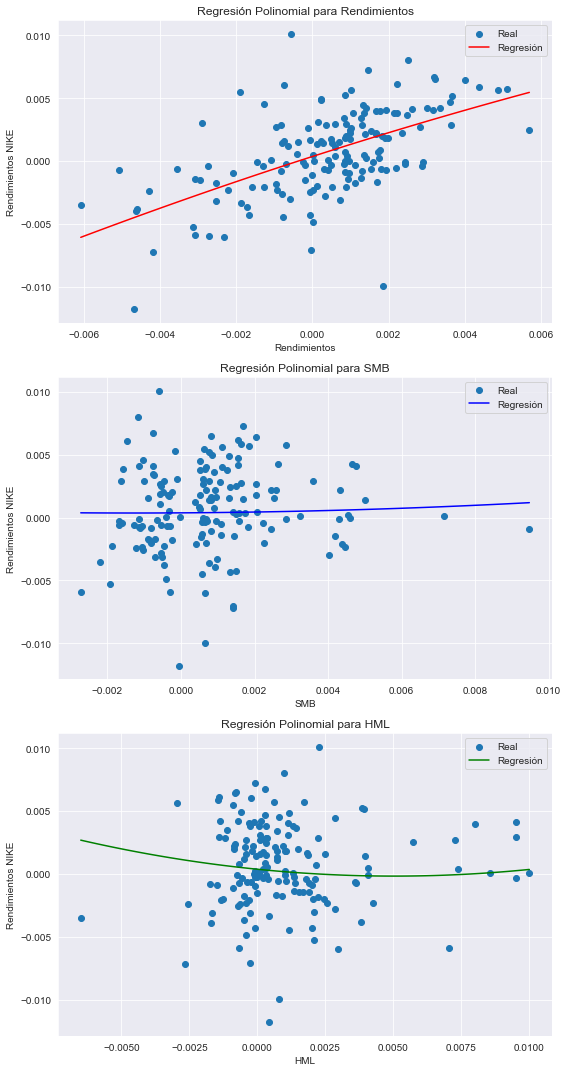

In [132]:
# Crear instancias de PolynomialFeatures y LinearRegression
poly = PolynomialFeatures(2)
model = LinearRegression()

# Transformar X con PolynomialFeatures
X_poly = poly.fit_transform(X)

# Ajustar el modelo
model.fit(X_poly, y)

# Valores para graficar
x_vals_rendimientos = np.linspace(min(X['rendimientos']), max(X['rendimientos']), 100)
x_vals_smb = np.linspace(min(X['SMB']), max(X['SMB']), 100)
x_vals_hml = np.linspace(min(X['HML']), max(X['HML']), 100)

# Crear las matrices de características polinomiales
x_vals_rendimientos_poly = poly.transform(np.column_stack((x_vals_rendimientos, np.zeros_like(x_vals_rendimientos), np.zeros_like(x_vals_rendimientos))))
x_vals_smb_poly = poly.transform(np.column_stack((np.zeros_like(x_vals_smb), x_vals_smb, np.zeros_like(x_vals_smb))))
x_vals_hml_poly = poly.transform(np.column_stack((np.zeros_like(x_vals_hml), np.zeros_like(x_vals_hml), x_vals_hml)))

# Predicciones
y_vals_rendimientos_pred = model.predict(x_vals_rendimientos_poly)
y_vals_smb_pred = model.predict(x_vals_smb_poly)
y_vals_hml_pred = model.predict(x_vals_hml_poly)

# Colores para las líneas
colors = ['red', 'blue', 'green']

# Graficar los resultados
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# Gráfica para rendimientosNike vs rendimientos
axs[0].scatter(X['rendimientos'], y, label='Real')
axs[0].plot(x_vals_rendimientos, y_vals_rendimientos_pred, color=colors[0], label='Regresión')
axs[0].set_xlabel('Rendimientos')
axs[0].set_ylabel('Rendimientos NIKE')
axs[0].set_title('Regresión Polinomial para Rendimientos')
axs[0].legend()

# Gráfica para rendimientosNike vs SMB
axs[1].scatter(X['SMB'], y, label='Real')
axs[1].plot(x_vals_smb, y_vals_smb_pred, color=colors[1], label='Regresión')
axs[1].set_xlabel('SMB')
axs[1].set_ylabel('Rendimientos NIKE')
axs[1].set_title('Regresión Polinomial para SMB')
axs[1].legend()

# Gráfica para rendimientosNike vs HML
axs[2].scatter(X['HML'], y, label='Real')
axs[2].plot(x_vals_hml, y_vals_hml_pred, color=colors[2], label='Regresión')
axs[2].set_xlabel('HML')
axs[2].set_ylabel('Rendimientos NIKE')
axs[2].set_title('Regresión Polinomial para HML')
axs[2].legend()

plt.tight_layout()
plt.show()



In [133]:
# Realizar las predicciones usando el modelo de regresión polinomial
y_vals_poly_pred = model.predict(X_poly)

# Calcular el RMSE para la regresión polinomial
rmse_poly = np.sqrt(mean_squared_error(y, y_vals_poly_pred))

print("RMSE para regresión polinomial:", rmse_poly)


RMSE para regresión polinomial: 0.0028047286921578543


In [134]:
#Obtener los coeficientes del modelo
coeficientes_polynomial = model.coef_
# Imprimir los coeficientes
print("Coeficientes del modelo:", coeficientes_polynomial)

Coeficientes del modelo: [[ 0.00000000e+00  9.74766692e-01  1.83714413e-02 -2.16623160e-01
  -1.38042918e+01  6.65516212e+00  6.24113406e+00  7.08584629e+00
  -1.01487918e+01  2.14994305e+01]]


### 3.3.1.3. CUBIC SPLINE

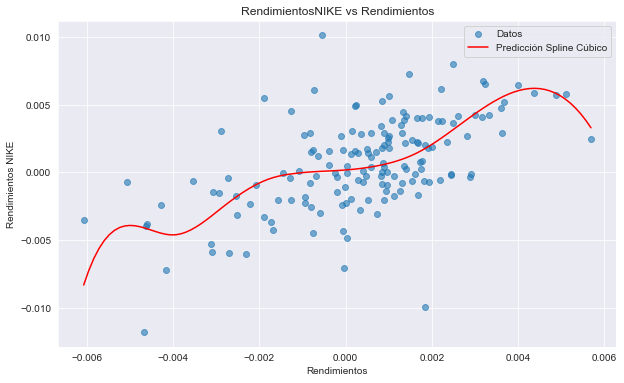

In [135]:
# Generación de spline cúbico con 3 nudos a 25, 50 y 75 para cada variable predictora
knots_rend = np.percentile(X['rendimientos'], [25, 50, 75])
knots_SMB = np.percentile(X['SMB'], [25, 50, 75])
knots_HML = np.percentile(X['HML'], [25, 50, 75])

transformed_x = dmatrix(
    "bs(rend, knots=knots_rend, degree=3, include_intercept=False) + bs(SMB, knots=knots_SMB, degree=3, include_intercept=False) + bs(HML, knots=knots_HML, degree=3, include_intercept=False)", 
    {"rend": X['rendimientos'], "SMB": X['SMB'], "HML": X['HML']},
    return_type='dataframe'
)

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado
cs = sm.GLM(y, transformed_x).fit()
mu = cs.mu

# Puntos para la gráfica
x_vals = np.linspace(X['rendimientos'].min(), X['rendimientos'].max(), 100)
x_SMB_vals = np.linspace(X['SMB'].min(), X['SMB'].max(), 100)
x_HML_vals = np.linspace(X['HML'].min(), X['HML'].max(), 100)

transformed_x_vals = dmatrix(
    "bs(rend, knots=knots_rend, degree=3, include_intercept=False) + bs(SMB, knots=knots_SMB, degree=3, include_intercept=False) + bs(HML, knots=knots_HML, degree=3, include_intercept=False)", 
    {"rend": x_vals, "SMB": x_SMB_vals, "HML": x_HML_vals},
    return_type='dataframe'
)

# Predicción con el modelo ajustado
mu_vals = cs.predict(transformed_x_vals)

# Gráfica para rendimientosNIKE vs rendimientos
plt.figure(figsize=(10, 6))
plt.scatter(X['rendimientos'], y, label='Datos', alpha=0.6)
plt.plot(x_vals, mu_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('Rendimientos')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs Rendimientos')
plt.show()


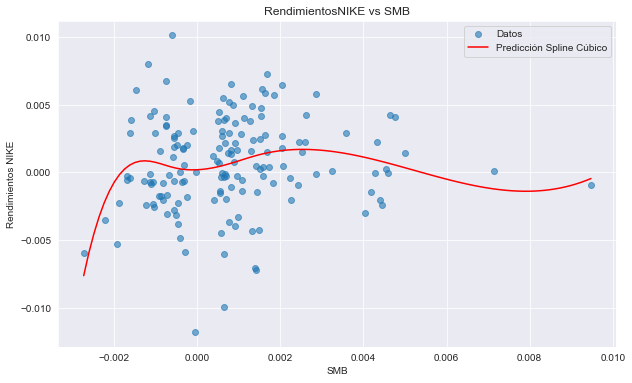

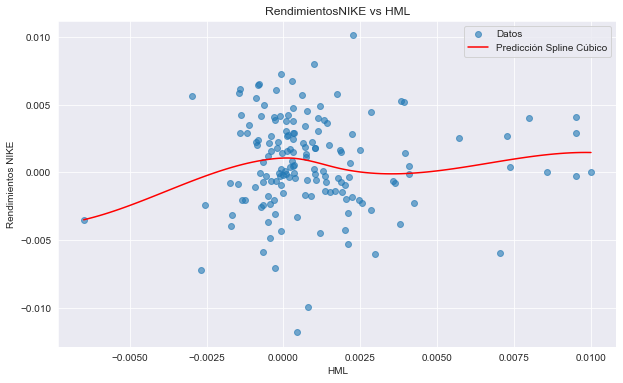

In [136]:
# Generación de spline cúbico con 3 nudos a 25, 50 y 75 para cada variable predictora
knots_SMB = np.percentile(X['SMB'], [25, 50, 75])
knots_HML = np.percentile(X['HML'], [25, 50, 75])

transformed_x_SMB = dmatrix(
    "bs(SMB, knots=knots_SMB, degree=3, include_intercept=False)",
    {"SMB": X['SMB']},
    return_type='dataframe'
)

transformed_x_HML = dmatrix(
    "bs(HML, knots=knots_HML, degree=3, include_intercept=False)",
    {"HML": X['HML']},
    return_type='dataframe'
)

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado (para SMB)
cs_SMB = sm.GLM(y, transformed_x_SMB).fit()
mu_SMB = cs_SMB.mu

# Ajuste del modelo lineal generalizado en el conjunto de datos transformado (para HML)
cs_HML = sm.GLM(y, transformed_x_HML).fit()
mu_HML = cs_HML.mu

# Puntos para la gráfica (SMB)
x_SMB_vals = np.linspace(X['SMB'].min(), X['SMB'].max(), 100)
transformed_x_SMB_vals = dmatrix(
    "bs(SMB, knots=knots_SMB, degree=3, include_intercept=False)",
    {"SMB": x_SMB_vals},
    return_type='dataframe'
)
mu_SMB_vals = cs_SMB.predict(transformed_x_SMB_vals)

# Puntos para la gráfica (HML)
x_HML_vals = np.linspace(X['HML'].min(), X['HML'].max(), 100)
transformed_x_HML_vals = dmatrix(
    "bs(HML, knots=knots_HML, degree=3, include_intercept=False)",
    {"HML": x_HML_vals},
    return_type='dataframe'
)
mu_HML_vals = cs_HML.predict(transformed_x_HML_vals)

# Gráfica para rendimientosNIKE vs SMB
plt.figure(figsize=(10, 6))
plt.scatter(X['SMB'], y, label='Datos', alpha=0.6)
plt.plot(x_SMB_vals, mu_SMB_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('SMB')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs SMB')
plt.show()

# Gráfica para rendimientosNIKE vs HML
plt.figure(figsize=(10, 6))
plt.scatter(X['HML'], y, label='Datos', alpha=0.6)
plt.plot(x_HML_vals, mu_HML_vals, color='red', label='Predicción Spline Cúbico')
plt.xlabel('HML')
plt.ylabel('Rendimientos NIKE')
plt.legend()
plt.title('RendimientosNIKE vs HML')
plt.show()


In [138]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular RMSE para el modelo de spline cúbico con todas las variables predictoras
rmse_total = np.sqrt(mean_squared_error(y, mu))

# Calcular RMSE para el modelo de spline cúbico con SMB
rmse_SMB = np.sqrt(mean_squared_error(y, mu_SMB))

# Calcular RMSE para el modelo de spline cúbico con HML
rmse_HML = np.sqrt(mean_squared_error(y, mu_HML))

# Mostrar los RMSE
print("RMSE para spline cúbico (todas las variables):", rmse_total)
print("RMSE para spline cúbico (SMB):", rmse_SMB)
print("RMSE para spline cúbico (HML):", rmse_HML)


RMSE para spline cúbico (todas las variables): 0.002717069385604116
RMSE para spline cúbico (SMB): 0.003319613735730394
RMSE para spline cúbico (HML): 0.0033855169399489566


In [139]:
# Coeficientes para rendimientos, SMB y HML
coeficientes = cs.params

beta_rendimientos = coeficientes[1]  # Coeficiente para rendimientos
beta_SMB = coeficientes[1 + len(knots_SMB)]  # Coeficiente para SMB
beta_HML = coeficientes[1 + len(knots_SMB) + len(knots_HML)]  # Coeficiente para HML

print("Beta para rendimientos:", beta_rendimientos)
print("Beta para SMB:", beta_SMB)
print("Beta para HML:", beta_HML)

Beta para rendimientos: -0.00019250611623487074
Beta para SMB: 0.007119249626022797
Beta para HML: 0.009581391655201735


### 3.3.1.4. NATURAL CUBIC SPLINE

In [140]:
# Un unico dataframes 


xy=pd.concat([y,X], axis=1)
xy.tail()

,rendimientosNIKE,rendimientos,SMB,HML
152,0.005184,0.003659,0.000762,0.003914
153,0.008024,0.002493,-0.001176,0.000990
154,0.003076,-0.002894,-0.000100,0.001124
155,0.004226,0.002996,0.002630,-0.001380
156,-0.004456,-0.000761,0.000571,0.001176


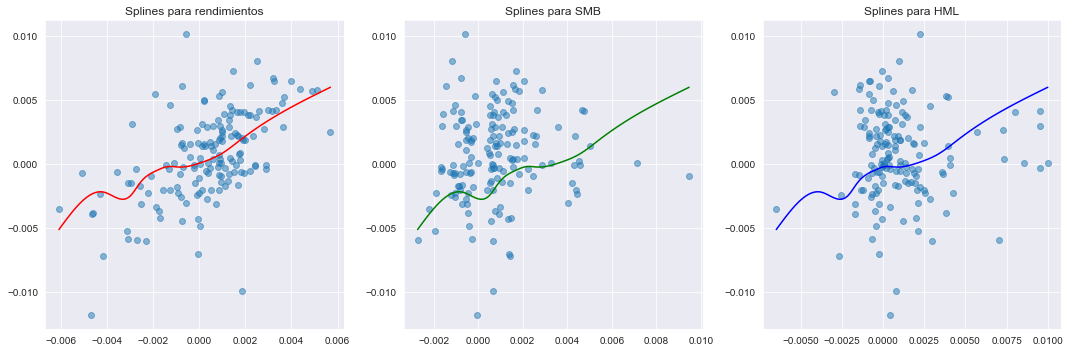

In [141]:
#  DataFrame 'xy'

# Ajustar el modelo con splines cúbicos
model_gam = smf.ols('rendimientosNIKE ~ cr(rendimientos, df=6) + cr(SMB, df=6) + cr(HML, df=6)', data=xy).fit()

# Definir los valores para las predicciones
x_rendimientos = np.linspace(xy['rendimientos'].min(), xy['rendimientos'].max(), 100)
x_SMB = np.linspace(xy['SMB'].min(), xy['SMB'].max(), 100)
x_HML = np.linspace(xy['HML'].min(), xy['HML'].max(), 100)

# Predecir los valores ajustados usando el modelo
y_pred = model_gam.predict(exog=dict(rendimientos=x_rendimientos, SMB=x_SMB, HML=x_HML))

# Graficar los resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(x_rendimientos, y_pred, label='rendimientos', color='r')
axs[0].scatter(xy['rendimientos'], xy['rendimientosNIKE'], alpha=0.5)
axs[0].set_title('Splines para rendimientos')

axs[1].plot(x_SMB, y_pred, label='SMB', color='g')
axs[1].scatter(xy['SMB'], xy['rendimientosNIKE'], alpha=0.5)
axs[1].set_title('Splines para SMB')

axs[2].plot(x_HML, y_pred, label='HML', color='b')
axs[2].scatter(xy['HML'], xy['rendimientosNIKE'], alpha=0.5)
axs[2].set_title('Splines para HML')

plt.tight_layout()
plt.show()


In [142]:
# Obtener los coeficientes del modelo ajustado
coeficientes = model_gam.params

# Mostrar los coeficientes
print(coeficientes)

Intercept                    0.000403
cr(rendimientos, df=6)[0]   -0.007471
cr(rendimientos, df=6)[1]   -0.000407
cr(rendimientos, df=6)[2]    0.000259
cr(rendimientos, df=6)[3]    0.000810
cr(rendimientos, df=6)[4]    0.001862
cr(rendimientos, df=6)[5]    0.005350
cr(SMB, df=6)[0]            -0.001458
cr(SMB, df=6)[1]             0.000634
cr(SMB, df=6)[2]            -0.000348
cr(SMB, df=6)[3]             0.000354
cr(SMB, df=6)[4]             0.000660
cr(SMB, df=6)[5]             0.000562
cr(HML, df=6)[0]             0.003399
cr(HML, df=6)[1]            -0.000421
cr(HML, df=6)[2]            -0.000476
cr(HML, df=6)[3]            -0.000825
cr(HML, df=6)[4]            -0.000939
cr(HML, df=6)[5]            -0.000335
dtype: float64


In [143]:
from sklearn.metrics import mean_squared_error
y_pred = model_gam.predict(xy)
rmse_test =mean_squared_error(xy.rendimientosNIKE, y_pred, squared=False)
rmse_test

0.002772815494273944